# EDA and Data Visualization using seaborn
### Data Science Pipeline Workshop 11 Juni 2022
- Author : Randy Galawana
- Email  : randy_galawana1@telkomsel.co.id

&copy; Telkomsel 2022

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/galawana/DSA_Python/master/csv/Churn_Modelling.csv'
df = pd.read_csv(url)

## EDA (Exploratory Data Analysis)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# we will exclude RowNumber, Customerid From continues data
new_cont = df[['CreditScore','Age','Balance','EstimatedSalary']]

### Find Outliers

Text(0.5, 1.0, 'NumOfProducts')

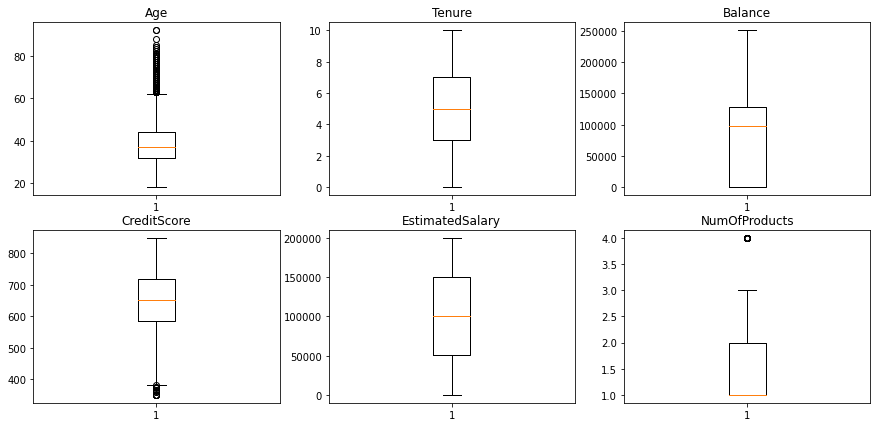

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,7))

ax1.boxplot(df.Age)
ax1.set_title('Age')

ax2.boxplot(df.Tenure)
ax2.set_title('Tenure')

ax3.boxplot(df.Balance)
ax3.set_title('Balance')

ax4.boxplot(df.CreditScore)
ax4.set_title('CreditScore')

ax5.boxplot(df.EstimatedSalary)
ax5.set_title('EstimatedSalary')

ax6.boxplot(df.NumOfProducts)
ax6.set_title('NumOfProducts')

<AxesSubplot:xlabel='EstimatedSalary'>

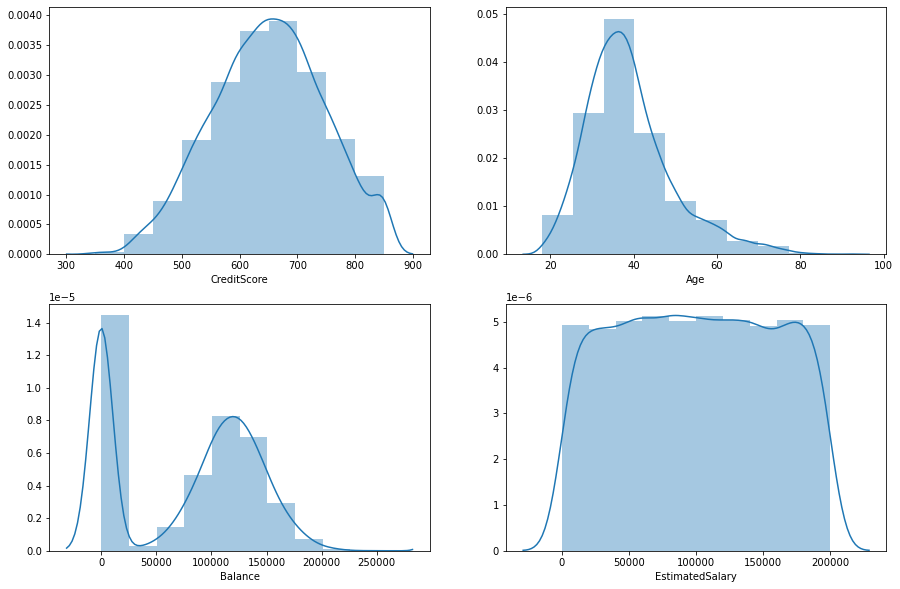

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))

sns.distplot(new_cont.CreditScore, bins=10, ax=ax1, axlabel='CreditScore')
sns.distplot(new_cont.Age, bins=10,ax=ax2, axlabel='Age')
sns.distplot(new_cont.Balance, bins=10, ax=ax3, axlabel='Balance')
sns.distplot(new_cont.EstimatedSalary, bins=10, ax=ax4, axlabel='EstimatedSalary')



* Most of banking customer Age is in range 35-40
* Balance 0 is the most common value

### Bivariate Analysis of Continues Data to churn parameter

In [8]:
def distplotMulti(feature, hue, data):
    plt.figure(figsize=(9,4))
    plt.title('KDE for {}'.format(feature))
    hues = df[hue].unique()
    for x in hues:
        ax0 = sns.kdeplot(df[df[hue]==x][feature], label=x)

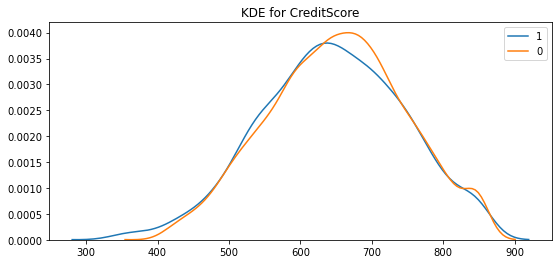

In [9]:
distplotMulti('CreditScore','Exited',df)

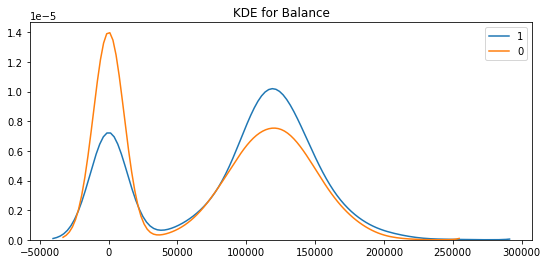

In [10]:
distplotMulti('Balance','Exited',df)

* Both churn and staying customer has similarly distribution for Balance, but 0 balance isn't the main reason customer churn, while mostly churn customer has balance betweem 100k - 150k

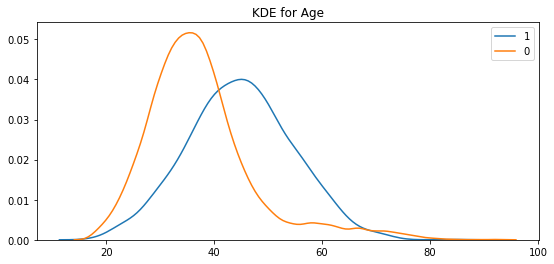

In [11]:
distplotMulti('Age','Exited',df)

* Churn customer has age range relatively wide, and dominantly from class 40-50 years old, while staying customer dominantly has age between 25 to 40 years

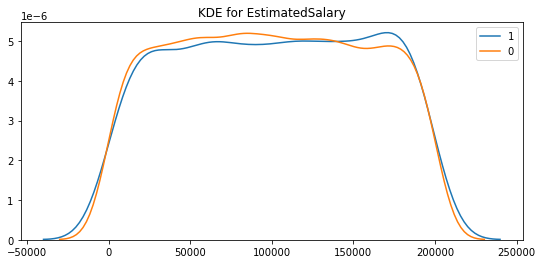

In [12]:
distplotMulti('EstimatedSalary','Exited',df)

* Both Churn and Staying customer has relatively same estimated salary

### Bivariate Analysis to categorical data to churn parameter

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

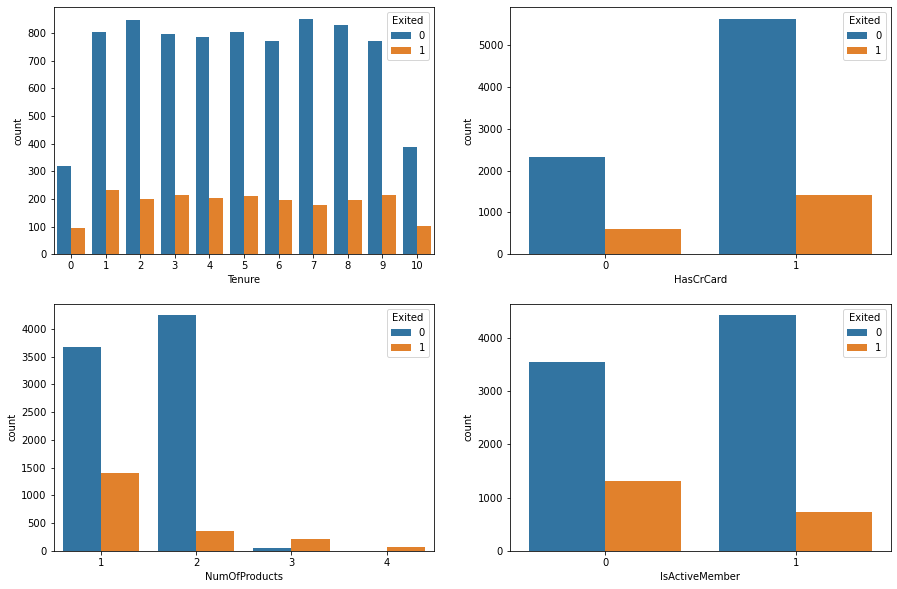

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))

sns.countplot(x='Tenure',hue='Exited',data=df, ax=ax1)
sns.countplot(x='HasCrCard',hue='Exited',data=df, ax=ax2)
sns.countplot(x='NumOfProducts',hue='Exited',data=df, ax=ax3)
sns.countplot(x='IsActiveMember',hue='Exited',data=df, ax=ax4)

* Churn Customer is highest on 1st year of contract, while on tenure 0 and 10 is the highest churn rate for customer
* Customer churn rate with/without credit card is relatively similar
* Customer with products more than 3 is expected to Churn, while customer with 2 product has lowest churn rate
* Non Active Member has higher percentage to churn than Active Member

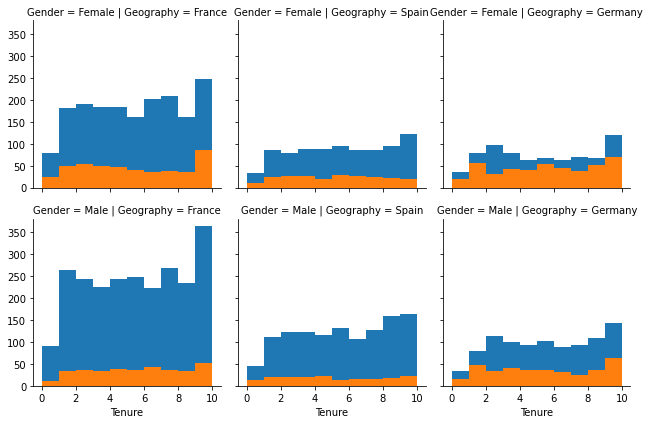

In [14]:
g = sns.FacetGrid(data=df, row='Gender', col='Geography',hue='Exited')
g.map(plt.hist,'Tenure')

* Female has higher churn rate, in demographic, highest churn rate is in Germany

### Corellation

<AxesSubplot:>

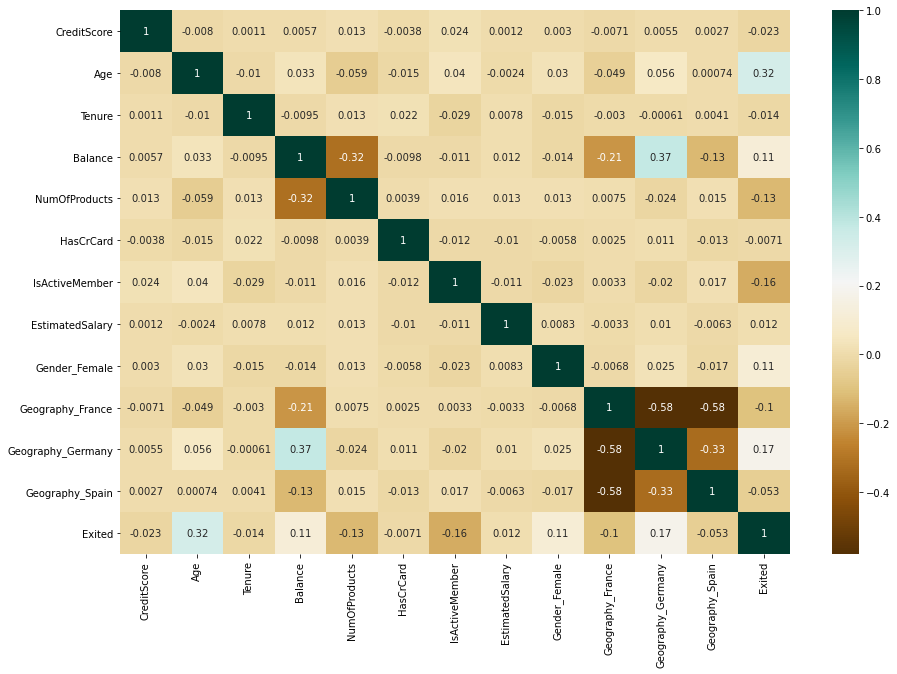

In [17]:
# Extract Numerical Feature
feature_num = ['CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
feature_track = ['Exited']
# Change Categorical Feature
feature_cat = ['Gender', 'Geography']

df_dummy = pd.get_dummies(df,columns = feature_cat)

feature_select = feature_num + ['Gender_Female', 'Geography_France', 'Geography_Germany','Geography_Spain'] + feature_track

correlation_matrics = df_dummy[feature_select].corr(method='spearman')
plt.figure(figsize=[15,10])
sns.heatmap(correlation_matrics, annot=True, cmap=plt.cm.BrBG)

In [18]:
correlation_matrics['Exited'].abs().sort_values()

HasCrCard            0.007138
EstimatedSalary      0.012081
Tenure               0.013978
CreditScore          0.023289
Geography_Spain      0.052667
Geography_France     0.104955
Gender_Female        0.106512
Balance              0.111110
NumOfProducts        0.125282
IsActiveMember       0.156128
Geography_Germany    0.173488
Age                  0.323968
Exited               1.000000
Name: Exited, dtype: float64